# Basic Plotting Examples

This script contains basic examples in case you need a refresher on plotting syntax.

In [1]:
import datetime
today = datetime.datetime.now().strftime("%Y/%m/%d %H:%M:%S")
print("Last edited:", today)

Last edited: 2018/01/29 11:48:58


In [2]:
import sys
print(sys.version)

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


# Using Matplotlib
## Plotting Data

Some basic plotting stuff. Need the following libraries:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Usually you would use the following command to set inline plots in notebooks. 

In [4]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


But if you want an interactive plot window, you can use the command below. Note: kernel may need to be restarted to switch between two plot outputs

Let's make a simple signal with some noise:

In [5]:
x1 = np.linspace(0,20,250)
y1 = np.sin(x1) + np.random.random_sample(len(x1))  # create signal with noise

Now let's plot it, annotate the figure, and change the x and y axis limits.

### Method 1: Plotting with Axis Handles

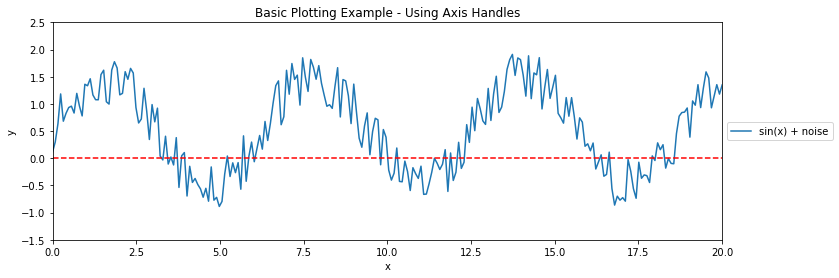

In [6]:
# Set figure size
f1, axh = plt.subplots(figsize=(12, 4))  

# Plot the data
axh.plot(x1, y1, label="sin(x) + noise")

# Add a horizontal line across the axis
axh.axhline(y=0, color='r', linestyle='--')

# Label title and axes
axh.set_title("Basic Plotting Example - Using Axis Handles")
axh.set_xlabel("x")
axh.set_ylabel("y")

# Set axis limits 
axh.set_xlim([0,20])
axh.set_ylim([-1.5,2.5])

# Show legend on outside right
axh.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()  # tidies up the output since some plotting commands also output matplotlib arrays

### Method 2: Plotting the Easier Way
We can also use a simpler set of plotting commands. Less explicit commmands ("plt" vs using specific axis handle), but it's good enough for single and quick plotting:

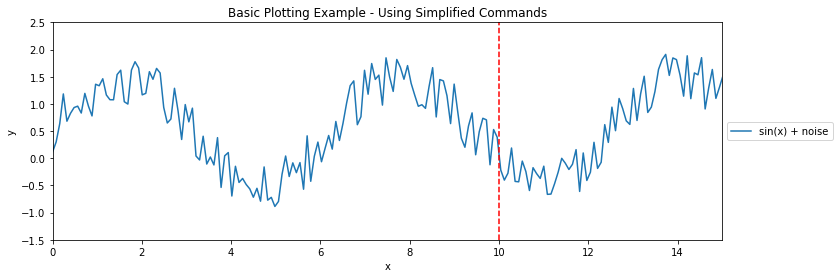

In [7]:
# Set figure size
plt.figure(figsize=(12,4))

# Plot the data
plt.plot(x1,y1,label="sin(x) + noise")

# Add a vertical line across the axis
plt.axvline(x=10, color='r', linestyle='--')

# Label title and axes
plt.title("Basic Plotting Example - Using Simplified Commands")
plt.xlabel("x")
plt.ylabel("y")

# Set axis limits 
plt.xlim([0,15])
plt.ylim([-1.5,2.5])

# Show legend on outside right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We can make a second set of data to plot it on top of the first data set:

In [8]:
y2 = 100*(np.cos(x1) + np.random.random_sample(len(x1)))

Plotting it on the same graph:

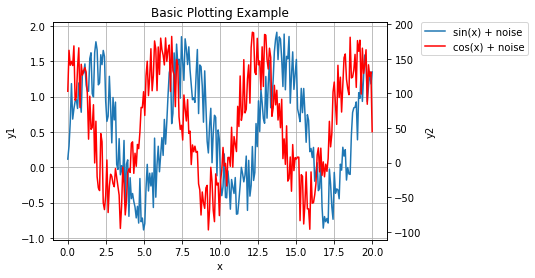

In [9]:
f1, axh = plt.subplots(1)
axh2 = axh.twinx()

ln1 = axh.plot(x1, y1, label="sin(x) + noise")
ln2 = axh2.plot(x1, y2, label="cos(x) + noise", color='r')
    
axh.set_title("Basic Plotting Example")
axh.set_xlabel("x")
axh.set_ylabel("y1")
axh2.set_ylabel("y2")

axh.grid(True)

# Do this to put both labels in the same legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
axh.legend(lns, labs, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)

## Three Ways to Make Polar Plots
Because this is Python, you can either use:
+ plt.polar()
+ plt.subplot()
+ plt.subplots()

The examples below show the different syntax associated with each.

In [10]:
# Some standard line data
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

### Method 1: plt.polar()
This is the easiest/fastest, but provides least amount of flexibility.

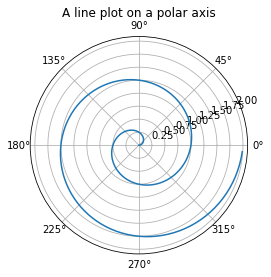

In [11]:
plt.polar(theta,r)

plt.title('A line plot on a polar axis', va='bottom')
plt.show()

### Method 2: plt.subplot()
Returns axis handle.

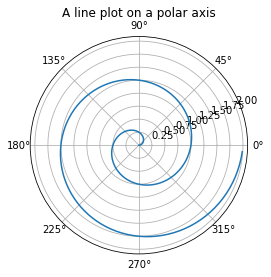

In [12]:
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

### Method 3: plt.subplots()
Probably the most useful plotting call since it returns both the figure and axis handle.

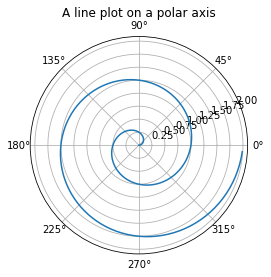

In [13]:
fig, ax = plt.subplots(1, subplot_kw=dict(projection='polar'))
ax.plot(theta, r)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

# Using Seaborn

In [14]:
import pandas as pd
import seaborn as sns

sns.reset_orig()   # Use the default matplotlib theme

In [15]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

## Distribution Plot

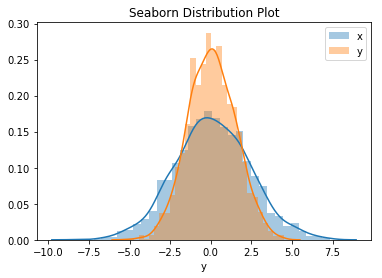

In [16]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
df = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    sns.distplot(df[col])
    
plt.title('Seaborn Distribution Plot')
plt.legend(['x','y'])
plt.show()

## Box Plot

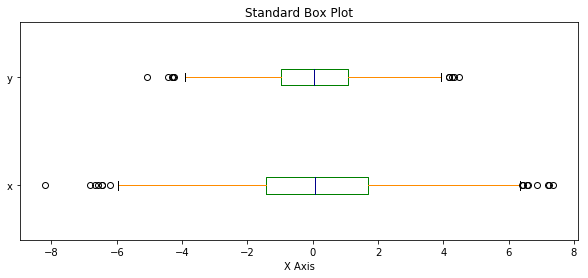

In [17]:
color = dict(boxes='Green', whiskers='DarkOrange',
             medians='DarkBlue', caps='Black')

df.plot.box(figsize=(10, 4), vert=False, color=color)

plt.title('Standard Box Plot')
plt.xlabel('X Axis')

plt.show()

## Violin Plot
Similar to box plots, but shows the distribution as well.

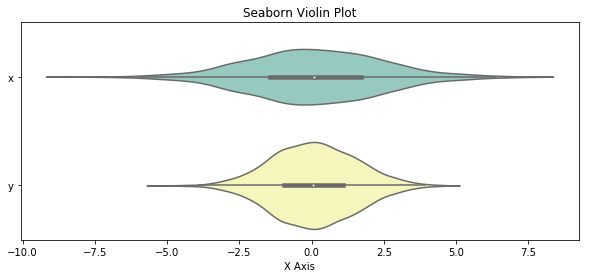

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

sns.violinplot(data=df, orient='h', palette="Set3")

sns.plt.title('Seaborn Violin Plot')
sns.plt.xlabel('X Axis')

sns.plt.show()

# Miscellaneous

## Creating Matrix of Subplots

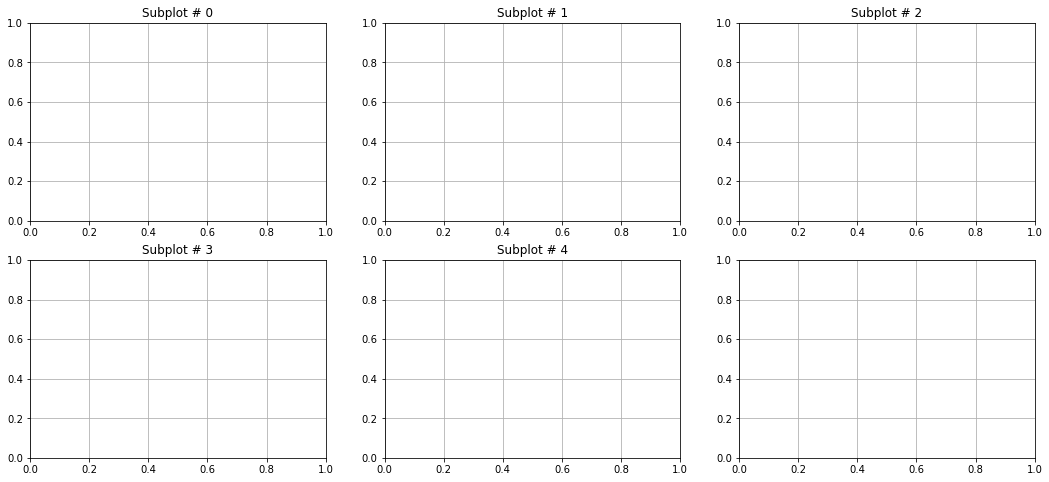

In [19]:
import math

def show_imgs(df, n_imgs):
    '''Displays images in a matplotlib subplot figure matrix.
    
    ARGS
        n_imgs - Number of images to be plotted
    
    RETURNS
        Displays matrix of subplots
    '''
    
    n_col = 3                         # Number of subplot columns 
    n_row = math.ceil(n_imgs/n_col)   # Number of subplot rows
    
    i = 0   # row
    j = 0   # col
    
    fig, ax = plt.subplots(n_row, n_col, figsize=(6*n_col,4*n_row))

    for n in range(n_imgs):       
        # Matplotlib doesn't like single row matrix
        if n_row == 1:
            ax[j].set_title("Subplot #%d"%(n))
        else:
            ax[i, j].set_title("Subplot # %d"%(n))
        
        # Iterate the row/col axis subplots
        if j < n_col-1:
            j += 1
        else:
            j = 0
            i += 1

    # Apply formating to all plots
    for i in range(n_row):
        for j in range(n_col):
            if n_row == 1:
                ax[j].grid('on')
            else:
                ax[i,j].grid('on')
            
    plt.show()
    
show_imgs(df, 5)